# Introducere in Prelucrarea Numerica a imaginilor utilizand Python 

### Obiective lucrare de laborator: 
- 1. Introducere in python si familiarizare cu modul de lucru in Jupyter Notebook 
- 2. Intelegerea unor notiuni generale de lucru cu imaginile digitale
- 3. Posibilitatea de a dezvolta, de unii singuri, a un program de baza pentru porcesarea imaginilor (vezi exercitiu din scriptul: lab01_pyImgsCv_PrgBaza_Exercitiu)

### Intro PNI

Disciplina Prelucrarea Numerica a Imaginilor (PNI) își propune să abordeze perspectiva practică din dezvoltarea unei aplicații ca componentă a unui sistem ce include viziune computerizată. 

Studenții se vor familiariza cu algoritmii de bază practici și simpli de prelucrare a imaginilor digitale utilizați în sistemele de viziune computerizată, oferind o posibilă bază de pregătire practică pentru activități de dezvoltare și cercetare în acest domeniu.

Accentul este pus pe modul de proiectare și implementare practică a algoritmilor de bază din procesarea sau analiza imaginilor digitale într-un mediu de programare. 

Astfel, în cadrul orelor de la această disciplină se vor aplica câteva simplificări: 
- se tratează doar imagini pe nivele de gri; 
- se discută doar metode de baza de prelucrare, fără a se intra in algoritmi mai avansați care presupun utilizarea cascadată/ combinată a metodelor de bază; 
- se va lucra cu imagini mici (de dimensiune/rezoluție redusă) pentru a ne putea axa pe efectul procesării date de algoritmul nostru, fără a fi influențați de efectul dat de interpolare/zoom la faza de vizualizare/afișare rezultat prin redimensionarea imaginilor.



### Pachete Python utilizate

Majoritatea pachetelor sunt instalate odata cu intalarea Anaconda, insa unele pachete necesita instalare suplimentara.

MOD INSTALARE PACHETE 
- se rulează din - Anaconda Prompt – comenzile încep cu:     pip install ....


Pe parcursul lucrarii introductive vom utiliza urmatoarele pachete:
- tkinter - pentru o interactiune minimala in rularea lucrarilor (prompter deschidere/salvare imagine)
- cv2 - OpenCV - pentru gestionarea imaginilor (comanda instalare: pip install opencv-contrib-python –upgrade)
- matplotlib - pentru afisarea imaginilor si graficelor
- numpy - pentru operatii numerice la nivel scalar si de matrice

## Selectie fisier imagine 

Pachet utilizat tkinter, subpachetul filedialog.

    tkinter - package (“Tk interface”) is the standard Python interface to the Tk GUI toolkit.
    tkinter.filedialog - module provides classes and functions for creating file/directory selection windows.
    
Modalitate import subpachet:
     
     from tkinter import filedialog

Functiile utilizate in lucrare: 

    - tkinter.filedialog.askopenfile(mode="r", **options) 
        - Create an Open dialog and return the opened file object(s) in read-only mode;
        
    - tkinter.filedialog.asksaveasfile(mode="w", **options) 
        - Create a SaveAs dialog and return a file object opened in write-only mode. 

La "options", se poate sa avem:

    parent - the window to place the dialog on top of
    title - the title of the window
    initialdir - the directory that the dialog starts in
    initialfile - the file selected upon opening of the dialog
    filetypes - a sequence of (label, pattern) tuples, ‘*’ wildcard is allowed
    defaultextension - default extension to append to file (save dialogs)
    multiple - when true, selection of multiple items is allowed


In [2]:
# O sa cream o interfata minimala pentru selectia interactiva a unei imagini
# utilizam pachetul tkinter.filedialog 
#    - folosim un prompter pentru a selecta o imagine 

# importam subpachetele necesare
from tkinter import filedialog

# Selectie imagine si incarcarea numelui fisierului selectat intr-o variabilă 
# ( numele fisierului este complet, continand si calea)
#      Setati ca prompterul pentru deschiderea imaginii sa deschida direct folderul cu imagini.
#           - initialdir = ? conform locatiei imaginilor de la voi din calculator
imgFileName =  filedialog.askopenfilename(initialdir = "D:/_TestImages/BerkeleyDataSet/",
                                          title = "Select file",
                                          filetypes = (("jpeg files","*.jpg"),("all files","*.*")))

print ("Fisierul selectat este: \n", imgFileName)


Fisierul selectat este: 
 D:/_TestImages/BerkeleyDataSet/41033.jpg


## Citirea si manipularea imaginilor 

Pentru citirea si manipularea imaginilor o sa folosim pachetul OpenCv.

    OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

Mod de a importa pachetul: 

    import cv2

Functii utilizate in lucrarea curenta:

    - cv2.imread(path, flag) incarca imaginea in spatiu de culoare RGB, dar lucreaza cu ordinea canalelor sub forma BGR (primul B, G, si apoi R).
    - cv2.cvtColor(src, code[, dst[, dstCn]]) - avand in vedere ca functiile din matplotlib, care le folosim pentru ilustrarea imaginilor direct in notebook (si nu ca o fereastra exterioara), lucreaza cu forma RGB - astfel pentru a putea afisa corect se realizeaza o prima conversie de la BGR la RGB folosind comanda: imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    - cv2.calcHist()
    


 #### cv2.imread - load an image from the specified file: 
 
Syntax: cv2.imread(path, flag)

Parameters:
    - path: A string representing the path of the image to be read.
    - flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR. 
    Alternatively, we can pass integer value for this flag
            cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected (flag = 1). 
            cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode (flag = 0)
            cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel (flag = -1)

Return Value: This method returns an image that is loaded from the specified file.

#### cv2.cvtColor - changing Color-space

Syntax: cv2.cvtColor(src, code[, dst[, dstCn]])

Parameters:
    - src: It is the image whose color space is to be changed.
    - code: It is the color space conversion code, among:
            cv2.COLOR_BGR2GRAY
            cv2.COLOR_BGR2RGB
            cv2.COLOR_BGR2HSV
    - dst: It is the output image of the same size and depth as src image. It is an optional parameter.
    - dstCn: It is the number of channels in the destination image. If the parameter is 0 then the number of the channels is derived automatically from src and code. It is an optional parameter.

Return Value: It returns an image. 


## Afisarea imaginilor si a graficelor 

Pentru afisarea imaginilor si a graficelor direct in notebook se utilizeaza pachetul matplotlib 

Mod de a importa pachetul: 

    import matplotlib.pyplot as plt
    
Functii utilizate:
    - plt.figure(figsize=(10,10)); 
    - plt.imshow(imgBGR); 
    - plt.show()

Afisare imagine ca BGR utilizand pachetul matplotlib - ilustrarea culorilor este gresita:


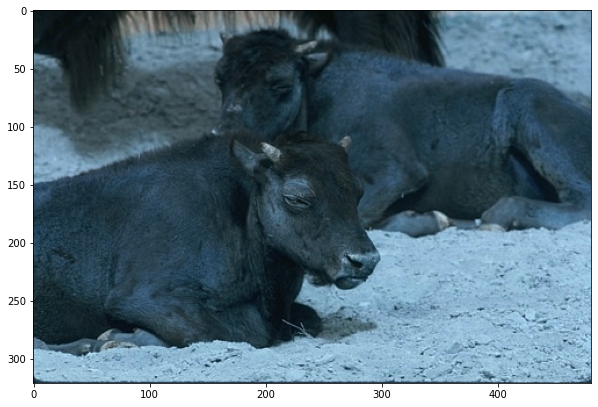

Dupa conversie imagine in formatul RGB - ilustrarea culorilor este corecta:


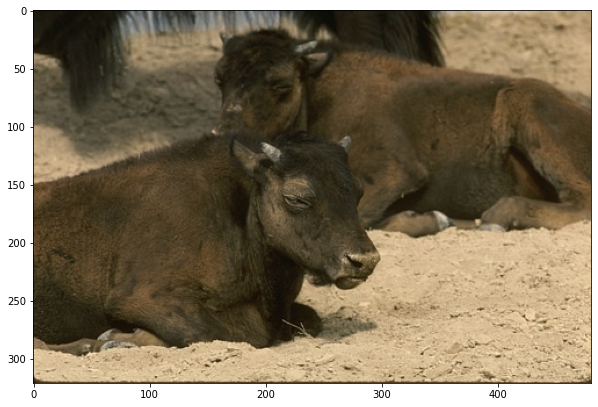

In [3]:
# Incarcare imagine cu openCv
import cv2 
import matplotlib.pyplot as plt

imgBGR = cv2.imread(imgFileName) # Imaginea se citeste ca BGR
print("Afisare imagine ca BGR utilizand pachetul matplotlib - ilustrarea culorilor este gresita:")
fig = plt.figure(figsize=(10,10)); plt.imshow(imgBGR); plt.show()

print("Dupa conversie imagine in formatul RGB - ilustrarea culorilor este corecta:")
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB) # conversie la GBR 
fig = plt.figure(figsize=(10,10)); plt.imshow(imgRGB); plt.show()

In [4]:
# Afisare informatii despre imagine
# imgRGB - imaginea este o matrice de culori, fiecare culoare reprezentata prin 3 valori (R,G,B)
#        - 
# imgRGB.shape - reprezinta rezolutia imaginii (Height x Width) si numarul de canale (channels)
# imgRGB.dtype - este tipul valorilor pentru reprezentarea intensitatii culorilor pe fiecare canal
#              = uint8 - reprezentare pe 8 biti fara semn, valori in intervalui {0, 1, ..., 255}

print("         Shape:" , imgRGB.shape, ", cele trei valori reprezinta: (Height, Width, channels)") 
print("         Type :" , imgRGB.dtype)

         Shape: (321, 481, 3) , cele trei valori reprezinta: (Height, Width, channels)
         Type : uint8


Afisare informatii despre imagine: 

In [5]:
# Putem afisa valorile din imgRGB
# imgRGB - este o matrice 3D (Height, Width, channels) 

imgRGB

array([[[ 25,  22,  13],
        [ 27,  24,  15],
        [ 28,  25,  16],
        ...,
        [182, 156, 119],
        [176, 150, 113],
        [175, 151, 115]],

       [[ 27,  24,  15],
        [ 28,  25,  16],
        [ 29,  26,  17],
        ...,
        [181, 155, 118],
        [179, 153, 116],
        [176, 152, 116]],

       [[ 30,  28,  16],
        [ 30,  28,  16],
        [ 29,  27,  15],
        ...,
        [176, 150, 113],
        [176, 150, 113],
        [175, 151, 115]],

       ...,

       [[ 56,  40,  15],
        [ 69,  53,  27],
        [ 75,  58,  30],
        ...,
        [190, 167, 136],
        [113,  92,  63],
        [ 90,  70,  43]],

       [[ 46,  34,  10],
        [ 56,  41,  18],
        [ 66,  50,  25],
        ...,
        [ 80,  59,  32],
        [ 72,  52,  25],
        [ 68,  51,  25]],

       [[ 41,  30,   8],
        [ 45,  35,  10],
        [ 51,  39,  15],
        ...,
        [ 74,  57,  31],
        [ 66,  50,  25],
        [ 56,  42,  16]]

In [6]:
# Sau mai putem spune ca avem de aface cu 3 matrici

R = imgRGB[:,:,0]
G = imgRGB[:,:,1]
B = imgRGB[:,:,2]

print("imgRGB.shape: ", imgRGB.shape)
print("R.shape:      ", R.shape) # o singura componenta este o matrice 2D 
R 


imgRGB.shape:  (321, 481, 3)
R.shape:       (321, 481)


array([[ 25,  27,  28, ..., 182, 176, 175],
       [ 27,  28,  29, ..., 181, 179, 176],
       [ 30,  30,  29, ..., 176, 176, 175],
       ...,
       [ 56,  69,  75, ..., 190, 113,  90],
       [ 46,  56,  66, ...,  80,  72,  68],
       [ 41,  45,  51, ...,  74,  66,  56]], dtype=uint8)

## Manipularea imaginilor pe nivele de gri
Citire imagine direct pe nivele de gri

In [ ]:
# functia imread din OpenCv permite sa citim imaginea direct pe nivele de gri 
# daca adaugam parametrul cv2.IMREAD_GRAYSCALE sau 0 (cod pentru gri)

imgGray = cv2.imread(imgFileName, cv2.IMREAD_GRAYSCALE)

print( "Ilustrare imagine pe nivele de gri, imgGray.shape =  ", imgGray.shape)
fig = plt.figure(figsize=(10,10)); plt.imshow(imgGray, cmap = 'gray'); plt.show()


In [ ]:
histr = cv2.calcHist([imgGray],[0],None,[256],[0,256])
fig = plt.figure(figsize=(20,3));
ax = fig.add_subplot(1,3, 1)
plt.plot(histr,color = col)
plt.xlim([0,256])
plt.show()

Afisare valori imgGray

In [ ]:
# Afisare valori imgGray - matrice 2D
imgGray # calculati valoare gray pentru pozitia (x,y) plecand de la imgRGB

## Extragerea si afisarea componentelor din formatul RGB

In [ ]:
# Afisare imagine color intr-o fereastra externa Jupyter Notebook
# TREBUIE sa mergem pe imagine si sa apasam tasta Esc pentru a merge mai departe

while True:
    cv2.imshow('Img (press Esc to continuu)',imgBGR) # fiind functie din openCv folosim forma BGR
    
    # IF we've waited at least 1 ms AND we've pressed the Esc
    if cv2.waitKey(1) & 0xFF == 27:
        break 


In [ ]:
print('\n   ----- INFO - Spatiu RGB - Componete si Histograme -----\n')
compName = ['R', 'G', 'B']
# Afisare componente R, G si B 
fig = plt.figure(figsize=(20,10))
col = ('b','g','r')
for i in range(0,3):
    ax = fig.add_subplot(2,3,i+1)
    plt.imshow(imgRGB[:,:,i],cmap='gray', vmin=0, vmax=255)
    plt.title('Componenta ' + compName[i])
plt.show()

# Afisare histrograme componente R, G si B 
fig = plt.figure(figsize=(20,2))
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([imgRGB],[i],None,[256],[0,256])
    ax = fig.add_subplot(1,3,i+1)
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
# Modificare valori dintr-o regiune din imagine
#   cu o valoare color constanta
plt.imshow(imgRGB); plt.show();
imgRGB[220:230,230:249,:] = [255,0,255]
plt.imshow(imgRGB); plt.show();

In [ ]:
imgRGB_m = imgRGB.copy() 
imgRGB_m[:,:,0] = 0 
#imgRGB_m[:,:,1] = 128 
plt.imshow(imgRGB_m); plt.show();


In [ ]:
cv2.destroyAllWindows() # se inchide fereastra externa cu imaginea afisata

In [ ]:
# import only asksaveasfile from filedialog 
# which is used to save file in any extension 
# Atentie - se trece si extensia imaginii (.jpg, .bmp, etc)

imgSaveFileName = filedialog.asksaveasfile(title = 'Save', 
                                         filetypes = [('All Files', '*.*'), ('JPG Files', '*.jpg')] )


print(imgSaveFileName.name)

cv2.imwrite(imgSaveFileName.name, imgRGB)

In [ ]:
print(imgSaveFileName.name)
